<a href="https://colab.research.google.com/github/Chohyungun/Chohyungun/blob/Dais/%EC%8A%A4%ED%84%B0%EB%94%94_3%EC%9E%A5_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3장 평가**


- 머신러닝 프로세스 구성
1. 데이터 가공/변환
2. 모델 학습/예측
3. **평가**

※ 평가 방법 예시 -> 성능평가지표(Evaluation Metrix)


#### 성능평가지표
- 모델이 분류/회귀의 여부에 따라 여러 종류로 나뉜다
1. 분류: 일반적으로는 실제와 예측 데이터의 정확성과 오류 빈도가 얼마나 적은지에 따라 달림(but 단순 정확도 문제만은 아님)
2. 회귀: 실제값과 예측값의 오차 평균값 기반함

- 분류의 성능평가 지표
1. 정확도(Accuracy)
2. 오차행렬(Confusion Matrix)
3. 정밀도(Precision)
4. 재현율(Recall)
5. F1 스코어
6. ROC AUC

- 분류의 종류
1. **이진 분류**: 긍정/부정과 같은 2개의 결과값(성능평가지표에서 강조)
2. 멀티 분류: 여러개의 결정 클래스

## **1. 정확도**
- 실제 데이터에서 예측데이터가 얼마나 같은지 판단하는 지표
- 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 정확도는 직관적으로 모델 예측 성능을 나타냄
- 하지만 ML 모델의 성능을 왜곡할 수 있음

In [ ]:
# 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순 Classifier
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  #fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass
  
  #predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
      return pred

In [ ]:
# Download the Titanic dataset
!gdown --id 1J9k6l2kzJ_VoWt9Epqy1qlKnMJ_mcTnR
data_path = '/content/train.csv'
from google.colab import drive
drive.mount('/content/drive')

Downloading...
From: https://drive.google.com/uc?id=1J9k6l2kzJ_VoWt9Epqy1qlKnMJ_mcTnR
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 42.4MB/s]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Q1
- 왜 정확도가 일치하지 않는가?
- 교재에 transform_features이 정의되지 않은 이유는??

In [ ]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv(data_path)
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(['Survived'], axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions =myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

NameError: ignored

- 위와 같은 단순한 알고리즘으로 예측을 하더라도 데이터 구성에 따라 정확도는 78%(저의 경우에는 61%)로 매우 높은 수치로 나올 수 있기 때문에 정확도를 평가지표로 사용할 때는 매우 신중해야 함.

- 특히, 불균형한 레이블 값 분포에서 모델 성능을 판단할 경우에는 적합한 평가 지표가 아님

- 가령, 100개의 데이터 중 90개의 레이블이 0, 10개의 레이블이 1인 경우에 무조건 0을 반환하는 모델을 만들면 정확도가 90%가 됨

**MNIST 데이터 세트를 변환하여 불균형한 데이터 세트를 만든 뒤 정확도 지표 적용시 어떤 문제가 발생할 수 있는지 살펴보기**
- MNIST 데이터세트: 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit을 예측하는데 사용
1. 0부터 9까지의 멀티레이블이지만 True, 나머지는 False인 불균형한 데이터 세트로 변환
2. 이후에 모든 데이터를 False(0)으로 예측하는 분류기를 만들어 정확도를 측정
3. 결과적으로 아무것도 하지 않고, 특정 결과로만 결과를 반환해도 정확도가 높게 측정되어 모델 성능이 높게 나타나는 현상이 발생

- 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

# 입력값으로 들어오는 X데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)
    
# 사이킷런 내장 데이터세트 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True, 이를 astype(int)로 1로 변환, 7번이 아니면 False고 0으로 변환
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블 0과 1의 분포도: ')
print(pd.Series(y_test).value_counts())

# FakeClassifier를 통해 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fake_pred = fakeclf.predict(X_test)
print('모든 예측을 0으로 했을 때의 정확도: ', accuracy_score(y_test, fake_pred))

레이블 테스트 데이터 크기:  (450,)
테스트 데이터 세트 레이블 0과 1의 분포도: 
0    405
1     45
dtype: int64
모든 예측을 0으로 했을 때의 정확도:  0.9


- 단순히 모두 0값으로 반환했음에도 불구하고 예측정확도가 90%가 도출됨
- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼어서는 안됨
- 이를 극복하기 위해 정확도는 여러 지표와 함께 적용되어야 함

##**2. 오차행렬**


- 분류 문제에서 예측 오류가 얼마인지, 어떤 유형의 오류가 발생하고 있는지를 함께 나타내는 지표
- 이진 분류에서 성능 지표로 잘 활용됨

- 오차 행렬은 위와 같이 4분면 행렬로 구분되며 실제 레이블 클래스 값과 예측 레이블클래스 값이 어떻게 매핑되는지를 표현함

- 예측된 클래스 값과 실제 클래스 값을 기준으로 TRUE, FALSE로 분류하며 TN, FP, FN, TP 의 행태로 값을 다양하게 분류해 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지를 알 수 있음

*TN(TrueNegative)*: 실제 값이 Negative인데 예측 값도 Negative

*FP(FalsePositive)* : 실제 값이 Negative인데 예측 값을 Positive

*FN(FalseNegative)* : 실제 값이 Positive인데 예측 값을 Negative

*TP(TruePositive)* : 실제 값이 Positive인데 예측 값도 Positive

In [ ]:
# MyFakeClassifier의 예측 결과인 fakepred와 실제결과인 y_test를 confusion_matrix의 인자로 입력해서 출력
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]])

##**3. 정밀도와 재현율**

- 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터수 = **(TN+TP)/(TN+FP+FN+TP)**
- 정밀도 = 예측대상(Positive)을 정확히 예측한 수 / Positive로 예측한 데이터 수 =**TP/(FP+TP)**
- 재현율 = 민감도/TPR(True Positive Rate) = Positive를 정확히 예측한 수 / 전체 Positive 데이터 수 = **TP/(FN+TP)**

- 재현율은 실제 Pos 양성 데이터를 Neg로 잘못 판단하게 되면 업무상 큰 영향이 발생할 때 중요 지표가 된다
- 정밀도는 실제 Neg 음성인 데이터 예측을 Pos 양성으로 잘못 판단하게 되었을 때 업무상 큰 영향이 발생할 때 중요 지표가 된다
- 정밀도만 높거나 , 재현율만 높다고 좋은 것이 아님. 둘다 좋아야함
- 사이킷런에서는 정밀도 계산을 위해 precision_score( ) , 재현율 계산을 위해 recall_score( ) 를 제공

In [ ]:
# 사이킷런의 정확도(accuracy), 정밀도(precison), 재현율(recall), 오차행렬(confusion matrix)을 계산하는 recall_score() API 호출
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}'.format(accuracy, precision, recall))

In [ ]:
# 로지스틱 회귀 기반으로 타이타닉 생존자 예측 및 API 평가 수행
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#원본 데이터 재로딩, 데이터가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


NameError: ignored

### 정밀도/재현율 트레이드 오프

- 정밀도와 재현율은 상호보완적인 지표로 한쪽을 높이려고 하다보면 다른 한쪽이 떨어지기 쉬움
- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지 판단하기 위해 개별 레이블별로 확률을 구하고, 그 확률이 큰 레이블 값으로 예측
- 일반적으로는 임계값을 50%로 정하고 이보다 크면 Positive, 작으면 Negative로 결정
- predict_proba( ) 를 통하여 개별 레이블별 예측확률을 반환받을 수 있음

In [ ]:
# 타이타닉  생존자 데이터에서 predict() 결과 값과 predict_proba() 결과 값을 비교
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba의 shape: {0}'.format(pred_proba.shape))
print('pred_proba의 array에서 앞 3개만 샘플로 추출 :\n', pred_proba[:3])

#예측확률 array와 예측 결과값 array를 병합하여 예측확률과 결괏값을 한 번에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba의 shape: (179, 2)
pred_proba의 array에서 앞 3개만 샘플로 추출 :
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중 더 큰 확률을 클래스 값으로 예측
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번째 컬럼과 두번째 컬럼의 합은 1

- 그리고 두 확률 중 큰 값의 레이블 값으로 predict( ) 메서드가 최종 예측


- predict()는 predict_proba()에 기반하여 생성된 API, predict_proba() 호출결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API
- 사이킷런은 분류 결정 임곗값을 조정해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정 가능

In [ ]:
# 사이킷런 정밀도/재현율 트레이드 오프 구현 로직
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]
# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크다면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성

- 위의 BInarizer을 이용해 predict()의 psedo 코드 생성
- 임계값 변수를 0.5 와 0.4로 지정하여 최종 예측

In [ ]:
# Binarizer의 threshold 값을 0.5로 설정
custom_threshold = 0.5

# predict_proba() 결과 값의 두 번째 컬럼, 즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print("threshold 0.5:")
get_clf_eval(y_test, custom_predict)
print("\n")

# Binarizer의 threshold 값을 0.4로 설정
custom_threshold = 0.4

# predict_proba() 결과 값의 두 번째 컬럼, 즉 Positive 클래스의 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
print("threshold 0.4:")
get_clf_eval(y_test, custom_predict)

threshold 0.5:
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492
정밀도 : 0.7742
재현율 : 0.7869


threshold 0.4:
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324
정밀도 : 0.7183
재현율 : 0.8361


- 임계값을 0.5->0.4로 낮추자 재현율이 올라가고 정밀도가 떨어짐
- 임곗값을 낮출수록 예측을 더 느슨하게 하여 True값이 많아짐
(분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 됨)
- 임계값을 높일수록 정밀도는 같이 높아지나, 재현율은 낮아짐(양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문에)
 

In [ ]:
# 임계값
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임계값:  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324
정밀도 : 0.7183
재현율 : 0.8361

임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492
정밀도 : 0.7656
재현율 : 0.8033

임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492
정밀도 : 0.7742
재현율 : 0.7869

임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659
정밀도 : 0.8364
재현율 : 0.7541

임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771
정밀도 : 0.8824
재현율 : 0.7377


- **precision_recall_curve(실제 클래스 값, 예측 확률 값)** : 임계값 변화에 따른 평가 지표 값을 반환하는 API
- 반환 값 : 정밀도 - 임계값별 정밀도 값을 배열으로 반환, 재현율 - 임계값별 재현율 값을 배열으로 반환

In [ ]:
# 임계값이 낮아질수록 정밀도는 높아지지만 재현율이 낮아지는 precision_recall_curve
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 떄의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[ : , 1]

# 실제값 데이터 세트와 레이블 값이 1일 때 예측확률을 precision_recall_curve의 인자로 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape: ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape:  (143,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


- precision_recall_curve()는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태 그래프로 시각화하는데 쓰일 수있음

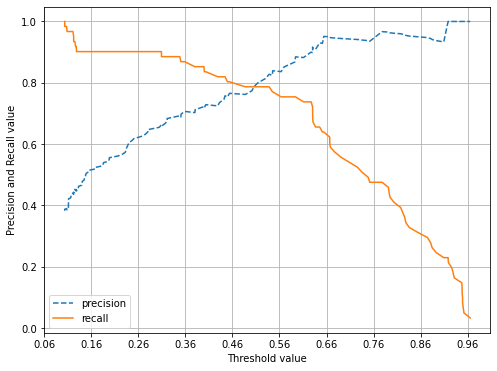

In [ ]:
# API를 이용한 정밀도와 재현율 곡선 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
# 정밀도는 점선으로, 재현율은 실선으로 표현

    # x축을 threshold 값, y축을 정밀도, 재현율로 그리기
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 임계값이 낮을수록 많은 수의 양성예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐

### 정밀도와 재현율의 맹점

- Positive예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨. 
- 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함(단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안됨) 
- 다음은 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법(쓸모는 없음)

1. 정밀도가 100%가 되는 방법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측.

2. 재현율이 100%가 되는 방법: 모든 data를 Positive로 예측

##**4. F1 스코어**




- 정밀도와 재현율을 결합한 지표, 재현율/정밀도가 어느 한쪽으로 치우치지 않을때 상대적으로 높은 값을 가짐
- F1 = 2/((1/recall)+(1/precision)) = 2*((precision*recall)/(precision+recall))
- Ex) 
-- 1) A:0.1, B:0.9 => 0.18 
-- 2) A:0.5, B:0.5 => 0.5 // 2)이 더 우수

- **f1_score()**: F1 스코어를 구하기위한 API
- **get_clf_eval(y_test,pred)**: 측정지표 출력함수

In [ ]:
# f1_score() 구현
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {:.4f}'.format(f1))

# 타이타닉 생존자 예측에서 임계값을 변화시키며 F1 스코어, 정밀도, 재현율 구하기
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    # F1 score print 추가
    print('\n정확도: {:.4f}\n정밀도: {:.4f}\n재현율: {:.4f}\nF1: {:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

F1 스코어 : 0.7805

임계값:  0.4
오차행렬
[[98 20]
 [10 51]]

정확도: 0.8324
정밀도: 0.7183
재현율: 0.8361
F1: 0.7727

임계값:  0.45
오차행렬
[[103  15]
 [ 12  49]]

정확도: 0.8492
정밀도: 0.7656
재현율: 0.8033
F1: 0.7840

임계값:  0.5
오차행렬
[[104  14]
 [ 13  48]]

정확도: 0.8492
정밀도: 0.7742
재현율: 0.7869
F1: 0.7805

임계값:  0.55
오차행렬
[[109   9]
 [ 15  46]]

정확도: 0.8659
정밀도: 0.8364
재현율: 0.7541
F1: 0.7931

임계값:  0.6
오차행렬
[[112   6]
 [ 16  45]]

정확도: 0.8771
정밀도: 0.8824
재현율: 0.7377
F1: 0.8036


- F1 스코어는 임곗값이 0.6일 때 가장 좋은 값 출력(but 재현율 크게감소)

##**5. ROC 곡선과 AUC**

- ROC곡선: 수신자 판단 곡선,이진 분류 모델 예측 성능 파악에 중요 평가 지표
- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate, 재현율(=민감도))이 어떻게 변하는지를 나타냄

- FPR을 x축으로 TPR을 Y축으로 잡으면 FPR 변화에 따른 TPR 변화가 곡선형태로 나타남

- TPR = TP/(FN+TP)
- TNR(True Negativ Rate): (=특이성) 민감도에 대응되는 지표이다
- TNR = TN/(FP+TN)
- FPR = FP/(FP+TN) = (1-TNR)(=1-특이성)

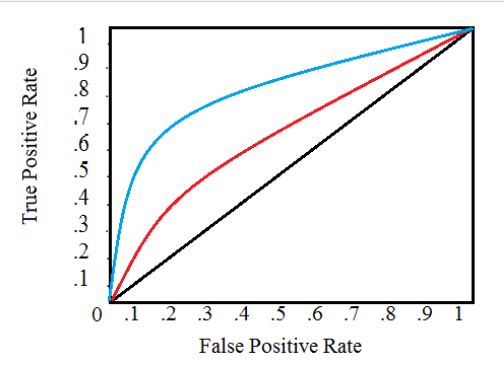
- 위의 그림은 ROC 곡선의 예시(직선은 ROC 곡선의 최저 값)

- 가운데 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류 ROC 직선
- 곡선이 가운데 직선에 가까울 수록 성능이 떨어지는 것이며 멀어질수록 성능이 뛰어난 것
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함

- 분류결정 임계값을 변경함으로써 FPR을 변화시킴('임계값=1'이면 Negative 값을 Positive로 예측하지 않고 FPR이 0이됨, 반대로 임계값을 낮출수록 FPR이 올라감)

- **roc_curve()**: ROC곡선을 구하는 API
- precision_recall_curve() API와 사용법이 유사

- 입력파라미터
1. y_true: 실제 클래스 값 array
2. y_score: predict_proba()의 반환 값 array에서 positive칼럼의 예측 확률이 보통 사용됨. array
 
-반환값
1. fpr: fpr값을 array로 반환
2. tpr: tpr값을 array로 반환
3. thresholds: threshold값을 array로 반환

In [ ]:
# 타이타닉 생존자 예측모델의 FPR, TPR 임곗값 구하기
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임계값을 5step으로 추출
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ', thr_index)
print('샘플용 10개의 임계값: ', np.round(thresholds[thr_index], 2))

# 5 step으로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임계값 배열의 index 10개:  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값:  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


- roc_curve( ) 의 결과값을 보면 임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐
- FPR이 조금씩 커질 때 FPR은 가파르게 커짐

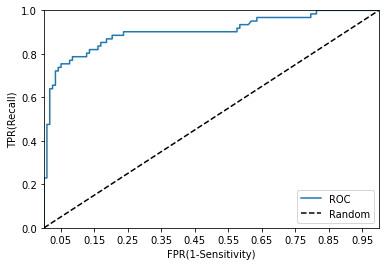

In [ ]:
# ROC: FPR 변화에 따른 TPR 변화
# ROC 곡선의 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

- 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용하여 분류의 성능지표로는 ROC면적에 기반한 AUC 값으로 결정

- AUC(Area Under Curve) : 곡선 밑의 면적 값으로 1에 가까울 수록 좋은 수치, 대각선 직선일 때 0.5

In [ ]:
# 타이타닉 로지스틱 회귀모델 AUC값 구하기
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.8341


- 평가지표 출력함수인 get_clf_eval()에 roc_acu_score()을 이용해 ROC AUC 값 측정 로직 추가
- ROC AUC는 예측 확률값을 기반으로 계산되므로 get_clf_eval()을 get_clf_eval(y_test, pred=None, pred_proba=None)으로 함수형 변경

In [ ]:
# get_clf_eval()로 정확도,정밀도,재현율,F1스코어에 **ROC AUC 값** 출력하기
def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  #ROC-AUC 추가
  print('정확도:{0:4f}, 정밀도: {1:4f}, 재현율: {2: 4f},\
        F1:{3:.4f},AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

##**6.피마 인디언 당뇨병 예측**


In [ ]:
# 라이브러리 구현
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive/')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1



- 네거티브: 500
- 파지티브: 268

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Null값은 없음, 피처 타입은 모두 int or float(Null 값과 문자열 처리를 위한 별도의 작업은 필요하지 않음)

### Q2.(질문은 아니고 연습하기)
- get_clf_eval() 구현법 익히기
- precision_recall_curve_plot() 구현법익히기

In [ ]:
# 1. get_clf_eval()로 정확도,정밀도,재현율,F1스코어 출력하기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

# 피쳐 데이터 세트 X, 레이블 데이터 세트 y 를 추출
X = diabetes_data.iloc[:,:-1]
y = diabetes_data['Outcome']

# 데이터를 훈련과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


In [ ]:
# 피처값 분포도 확인
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- describe(): DataFrame 데이터값의 분포도 점검
- 위 경우에 분포도를 보면 min()이 0값으로 되어있는 피처가 많다(glucose(포도당)이 0이 되면 안됨)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

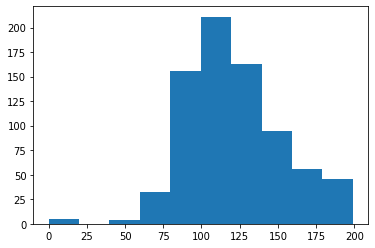

In [ ]:
plt.hist(diabetes_data['Glucose'],bins=10)

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

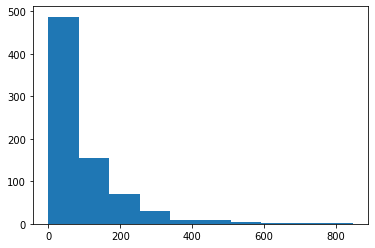

In [ ]:
plt.hist(diabetes_data['Insulin'],bins=10)

- min() 값이 0으로 되어 있는 피처가 전체 대이터 건수 대비 몇 퍼센트인지 파악하기

In [ ]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

# 전체 데이터 건수 세기
total_count = diabetes_data['Glucose'].count()

# 피처별 반복으로 데이터 값이 0인 데이터 건수를 추출 후 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는{2:2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는0.651042%
BloodPressure 0 건수는 35, 퍼센트는4.557292%
SkinThickness 0 건수는 227, 퍼센트는29.557292%
Insulin 0 건수는 374, 퍼센트는48.697917%
BMI 0 건수는 11, 퍼센트는1.432292%


- SkinThickness, Insulin의 0값 비율이 높음(데이터를 일괄 삭제할 경우 학습이 어려울 수 있음)
- 0 피처값을 평균값으로 대체 필요

In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

- 0 => 평균값으로 대체한 데이터 세트에 피처 스케일링 적용

In [ ]:
# 데이터 세트에 대해 피처 스케일링을 적용하여 변환하기(로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 일반적으로 성능이 좋음)
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,  y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[90 10]
 [21 33]]

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
AUC: 0.7556


- 데이터 변환과 스케일링을 통해 성능 수치 소폭 향상
- 재현율 수치가 여전히 낮으므로 개선 필요 => get_eval_by_threshold()로 임곗값 높여주기

###**Q3 평가지표 조사 함수 연습**
- arrange() 왜 이상하게 되는가

In [ ]:
import numpy as np
# 평가지표를 조사하기 위한 새로운 함수 생성
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

thresholds = np.arange(0.3,0.5,0.03)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3
오차행렬:
 [[67 33]
 [11 43]]

정확도: 0.7143
정밀도: 0.5658
재현율: 0.7963
F1: 0.6615
AUC: 0.7331

임계값:  0.32999999999999996
오차행렬:
 [[72 28]
 [12 42]]

정확도: 0.7403
정밀도: 0.6000
재현율: 0.7778
F1: 0.6774
AUC: 0.7489

임계값:  0.35999999999999993
오차행렬:
 [[76 24]
 [15 39]]

정확도: 0.7468
정밀도: 0.6190
재현율: 0.7222
F1: 0.6667
AUC: 0.7411

임계값:  0.3899999999999999
오차행렬:
 [[78 22]
 [16 38]]

정확도: 0.7532
정밀도: 0.6333
재현율: 0.7037
F1: 0.6667
AUC: 0.7419

임계값:  0.4199999999999999
오차행렬:
 [[84 16]
 [18 36]]

정확도: 0.7792
정밀도: 0.6923
재현율: 0.6667
F1: 0.6792
AUC: 0.7533

임계값:  0.44999999999999984
오차행렬:
 [[85 15]
 [18 36]]

정확도: 0.7857
정밀도: 0.7059
재현율: 0.6667
F1: 0.6857
AUC: 0.7583

임계값:  0.4799999999999998
오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641


- 정확도, 정밀도, 재현율, F1, AUC 등의 평가 지표를 보고 적절히 판단하여 임계값을 재 설정하여 예측을 수행할 수 있음

In [ ]:
# 임계값을 0.48로 설정하여 예측 수행
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 predict_proba() 예측확률의 array에서 1에 해당하는 컬럼 값을 대입하여 Binarizer 반환하기
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048)

오차행렬:
 [[88 12]
 [19 35]]

정확도: 0.7987
정밀도: 0.7447
재현율: 0.6481
F1: 0.6931
AUC: 0.7641
